Saving original.jpg to original.jpg


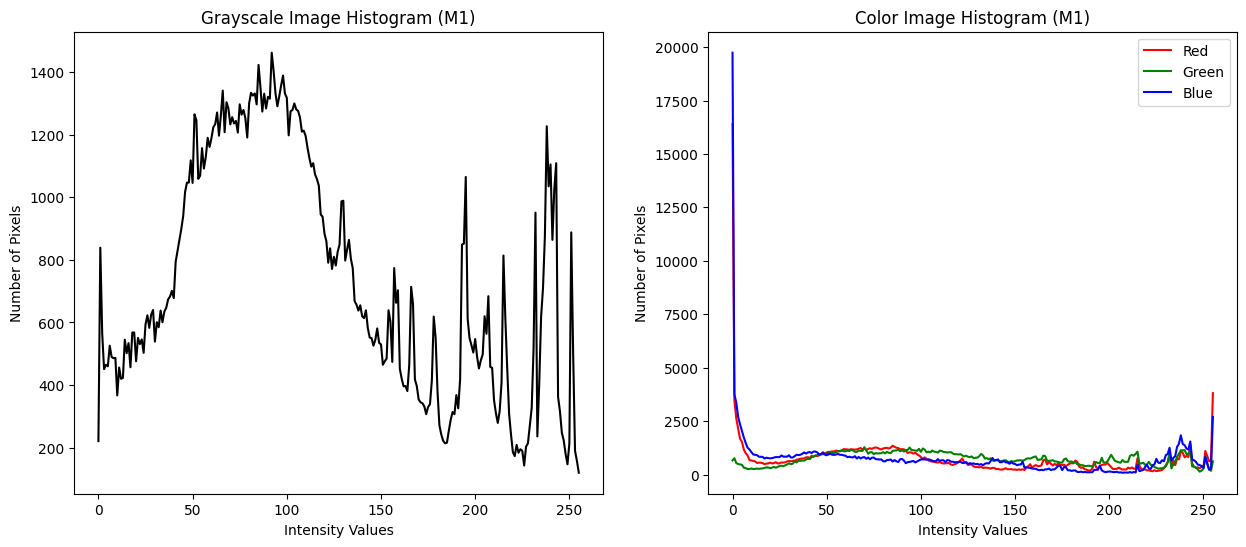

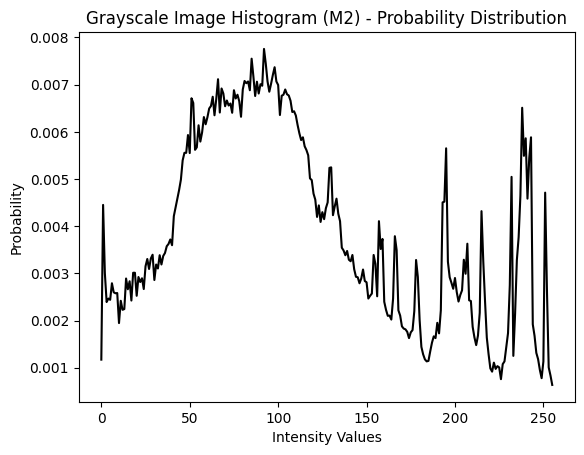

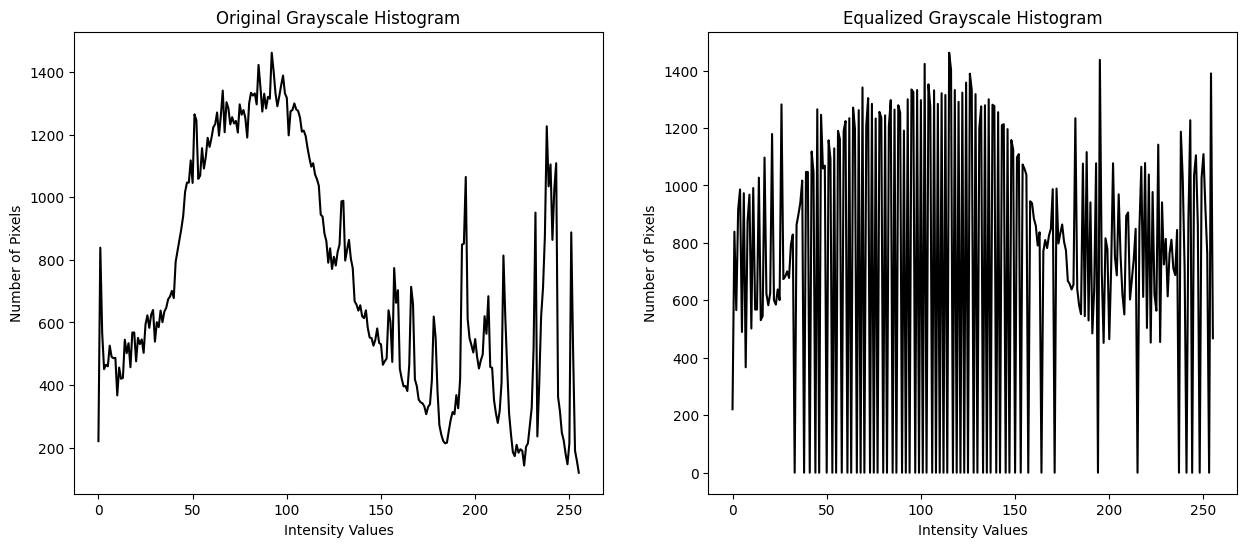

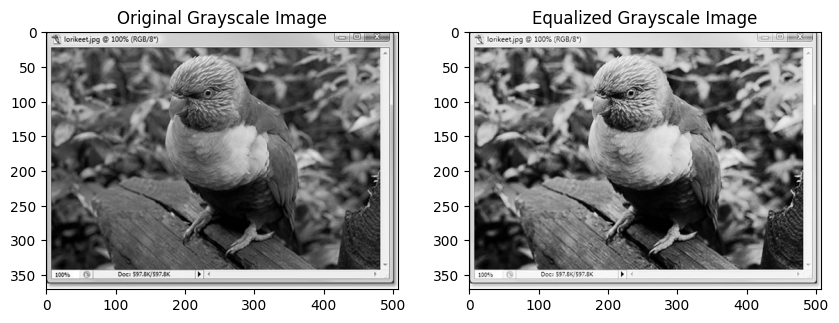

In [ ]:
#e22cseu0223 lab 4
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload image to Colab
from google.colab import files
uploaded = files.upload()

# Load an image
image_name = list(uploaded.keys())[0]
color_img = cv2.imread(image_name)

# Convert to RGB for display
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)

# **1. Compute histogram for grayscale and color images**

# Grayscale histogram
hist_gray = cv2.calcHist([gray_img], [0], None, [256], [0, 256])

# Color histograms
channels = ('Red', 'Green', 'Blue')
colors = ('r', 'g', 'b')
hist_colors = []

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(hist_gray, color='black')
plt.title('Grayscale Image Histogram (M1)')
plt.xlabel('Intensity Values')
plt.ylabel('Number of Pixels')

# **2. Visualize Color Histograms**
plt.subplot(1, 2, 2)
for i, color in enumerate(colors):
    hist = cv2.calcHist([color_img], [i], None, [256], [0, 256])
    hist_colors.append(hist)
    plt.plot(hist, color=color)
plt.title('Color Image Histogram (M1)')
plt.xlabel('Intensity Values')
plt.ylabel('Number of Pixels')
plt.legend(channels)
plt.show()

# **3. Probability of Occurrence (M2)**
num_pixels = gray_img.size
hist_prob = hist_gray / num_pixels

plt.plot(hist_prob, color='black')
plt.title('Grayscale Image Histogram (M2) - Probability Distribution')
plt.xlabel('Intensity Values')
plt.ylabel('Probability')
plt.show()

# **4. Contrast enhancement using Histogram Equalization**
eq_gray = cv2.equalizeHist(gray_img)

# Plot original and equalized histograms
hist_eq_gray = cv2.calcHist([eq_gray], [0], None, [256], [0, 256])

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(hist_gray, color='black')
plt.title('Original Grayscale Histogram')
plt.xlabel('Intensity Values')
plt.ylabel('Number of Pixels')

plt.subplot(1, 2, 2)
plt.plot(hist_eq_gray, color='black')
plt.title('Equalized Grayscale Histogram')
plt.xlabel('Intensity Values')
plt.ylabel('Number of Pixels')
plt.show()

# Display Original vs Equalized Image
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(eq_gray, cmap='gray')
plt.title('Equalized Grayscale Image')
plt.show()